In [1]:
!pip install -Uqq fastai --upgrade
!pip install -Uqq fastcore --upgrade
!pip install -Uqq duckduckgo_search --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 8.4 MB/s eta 0:00:00


In [2]:
import fastai
import fastcore
print('Fast.ai version:', fastai.__version__)
print('Fastcore version:', fastcore.__version__)

Fast.ai version: 2.7.12
Fastcore version: 1.5.29


In [3]:
from fastai.vision.all import *
from fastai.vision.widgets import *

I downloaded images from duckduckgo and combined it with kaggle faces.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd '/content/drive/MyDrive/Project'

/content/drive/MyDrive/Project


In [6]:
%ls

people/


In [7]:
gender_types = 'male','female'
path = Path('people')

In [8]:
#if not path.exists():
 #   path.mkdir()
  #  for o in gender_types:
   #     print(f'Finding images for {o}')
    #    dest = (path/o)
     #   dest.mkdir(exist_ok=True)
      #  urls = search_images(f'{o}', max_images=150)
       # download_images(dest, urls=urls)

In [9]:
fns = get_image_files(path)
fns

(#5422) [Path('people/male/1 (2519).jpg'),Path('people/male/1 (2455).jpg'),Path('people/male/1 (2471).JPG'),Path('people/male/1 (2511).jpg'),Path('people/male/1 (2542).jpg'),Path('people/male/1 (2549).jpg'),Path('people/male/1 (2453).jpg'),Path('people/male/1 (2477).jpg'),Path('people/male/1 (2515).jpg'),Path('people/male/1 (2544).jpg')...]

In [10]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink)

(#0) []

In [10]:
genders = DataBlock(blocks=(ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
                    get_y=parent_label,
                    item_tfms=RandomResizedCrop(224, min_scale=0.5), 
                    batch_tfms=aug_transforms())

In [11]:
dls = genders.dataloaders(path)

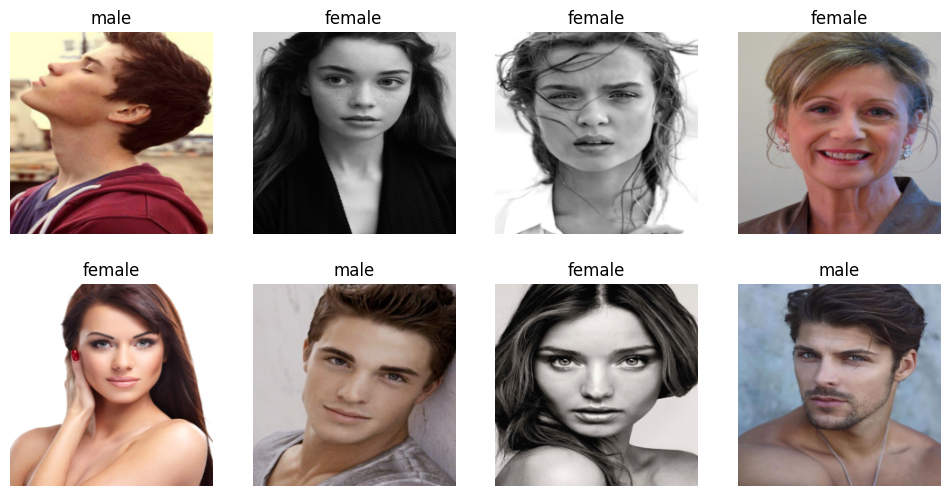

In [12]:
dls.valid.show_batch(max_n=8, nrows=2)

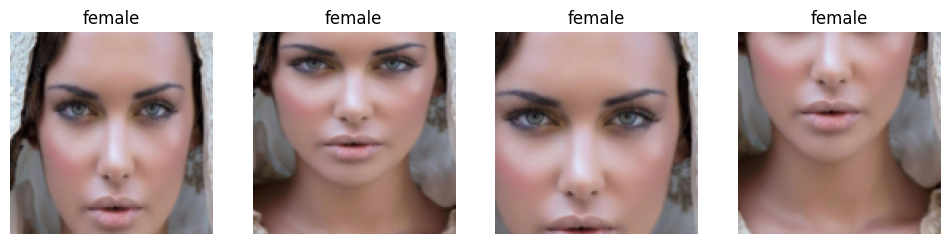

In [13]:
genders = genders.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = genders.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

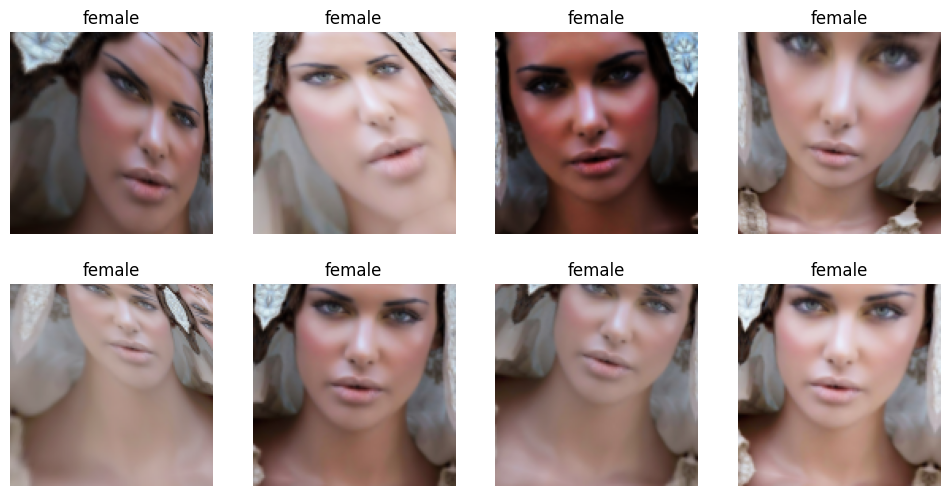

In [14]:
genders = genders.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = genders.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

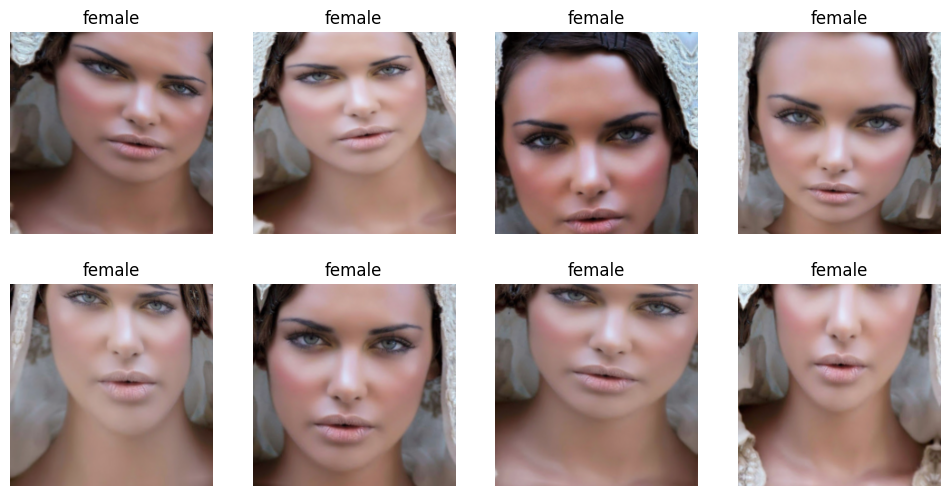

In [15]:
genders = genders.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = genders.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

epoch,train_loss,valid_loss,error_rate,time
0,0.442052,0.190588,0.063653,11:22


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.201900,0.082673,0.030443,03:57
1,0.135969,0.084935,0.026753,03:59
2,0.089301,0.035312,0.010148,03:52
3,0.053333,0.032874,0.007380,03:52
4,0.035365,0.019294,0.003690,03:53
5,0.025752,0.015962,0.005535,03:51


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes sh

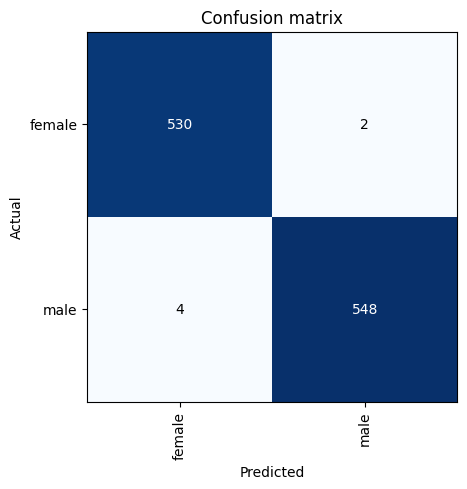

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

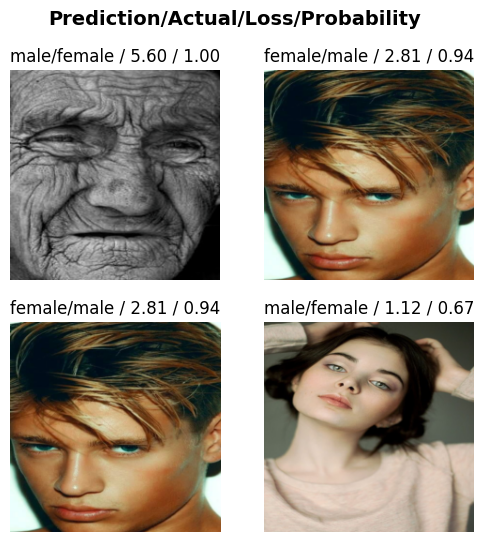

In [18]:
interp.plot_top_losses(4, nrows=2,)

In [19]:
learn.export()

In [20]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [21]:
!ls

export.pkl  people
